In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import PIL
from PIL import Image
import os

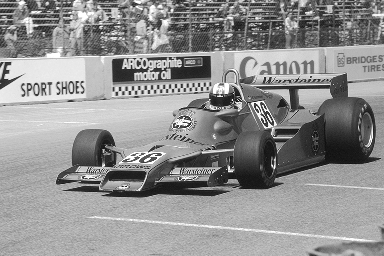

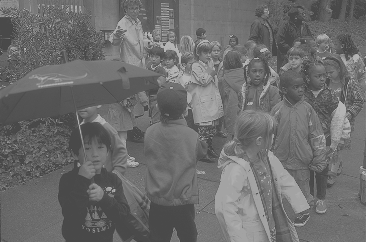

Text(0.5, 0, 'Pixel Value (between 0-255)')

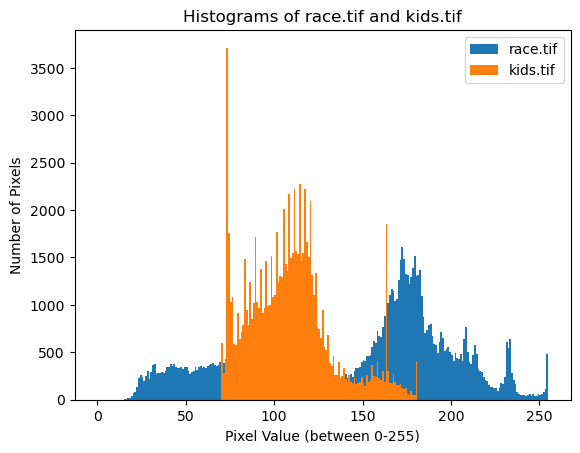

In [84]:
###PART ONE OF LAB#####
im_race = Image.open('race.tif') #W x H
im_kids = Image.open('kids.tif')
display(im_race)
display(im_kids)
im_race = np.array(im_race) #H x W
im_kids = np.array(im_kids)

plt.hist(im_race.flatten(), bins = np.linspace(0,255,256), label = "race.tif")
plt.hist(im_kids.flatten(), bins = np.linspace(0,255,256), label = "kids.tif")
plt.legend()
plt.title("Histograms of race.tif and kids.tif")
plt.ylabel("Number of Pixels")
plt.xlabel("Pixel Value (between 0-255)")
####END PART ONE #####

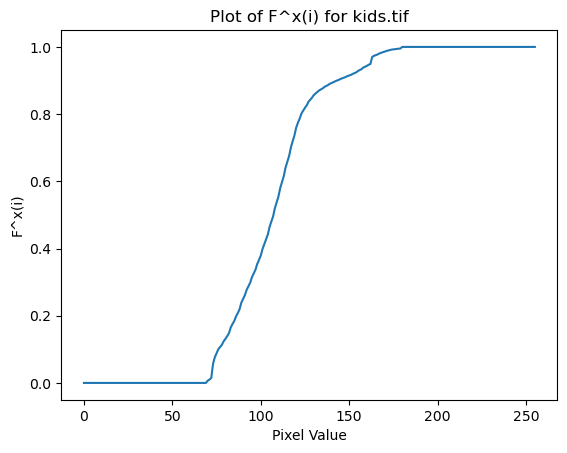

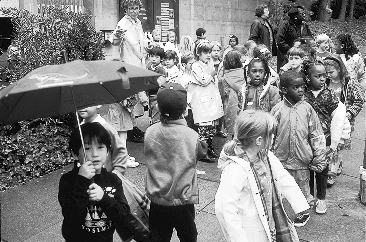

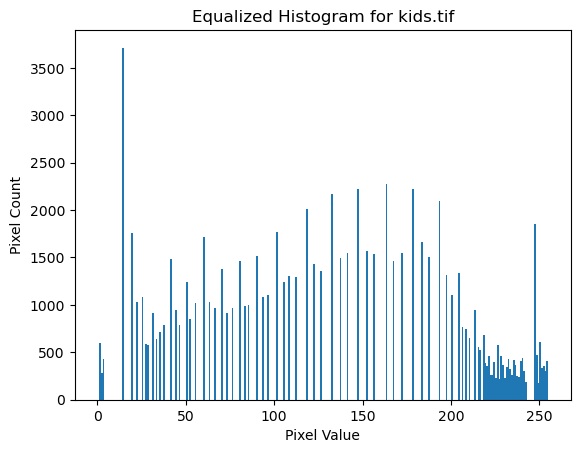

In [85]:
####PART 2 #####
np.random.seed(seed=0)

def equalize(X):
    """
    This function first will approximate the CDF of each pixel value in the image. 
    Numerator is for all pixels in range 0,255, get sum of pixel count for pixel values 0, then sum of pixel values 
    0 and 1, then sum of pixel values for 0, 1, and 2. ... until we have the sum of pixel values for 0 ... 254, 255. 
    Obviously, the sum of pixels with values between and inclusive of 0 to 255 is the same as H * W. 

    The denominator is H*W. 

    Fx(Xs) is Ys. The probability that a pixel is less than or equal to the value of Xs. 
    
    We need to find the maximum and minimum Ys.

    """

    #part 1, COMPUTE THE NORMALIZED CDF
    frequency_arr = np.zeros(256)            
    for val in range(0,256):
        frequency_arr[val] = ((X >= 0) & (X <= val)).sum() 
    
    #Find all the Ys - i.e, probability of each pixel. 
    frequency_arr = frequency_arr / (X.shape[0] * X.shape[1]) # this is an array of F^x(i) or the CDF
    #plot F^x(i) for the kids.tif image
    #print(frequency_arr)
    plt.plot(frequency_arr)
    plt.title("Plot of F^x(i) for kids.tif")
    plt.xlabel("Pixel Value")
    plt.ylabel("F^x(i)")
    plt.show()
    

    Ys_max = frequency_arr.max()
    Ys_min = frequency_arr.min()
    #print(X.shape)
    for i in range(X.shape[0]): #apply transformation from Xs to Zs
        for j in range(X.shape[1]):
            orig_pix = X[i,j]
            X[i,j] = 255 * (frequency_arr[orig_pix] - Ys_min) / (Ys_max - Ys_min)

    return X
#histogram normalization is the transformation from Xs to Zs. 
X = equalize(im_kids)
plt.hist(X.flatten(), bins = np.linspace(0,255,256), label = "kids.tif")
plt.title("Equalized Histogram for kids.tif")
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
### Plot image ####
im_kids_equalized_hist = Image.fromarray(X)
display(im_kids_equalized_hist)



uint8


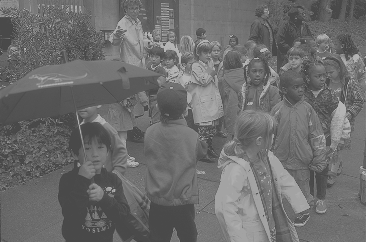

uint8


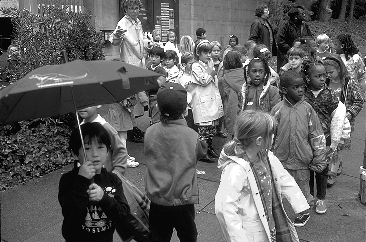

Text(0.5, 0, 'Pixel Value (between 0-255)')

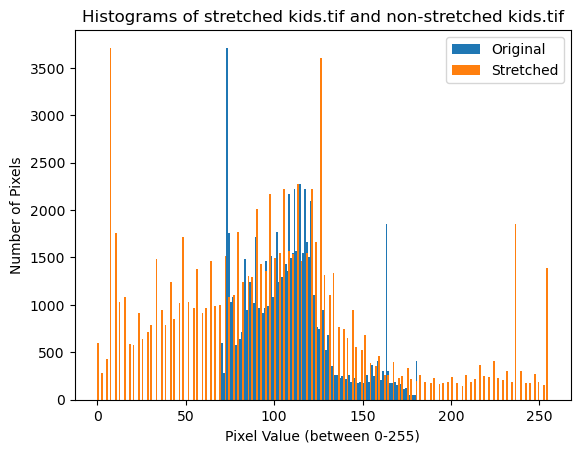

In [10]:
### PART 3 - CONTRAST STRETCHING ####
im_kids = Image.open('kids.tif')
im_kids = np.array(im_kids).astype(np.uint8) # will be in H x W
print(im_kids.dtype) #input image im_kids is now uint8
plt.hist(im_kids.flatten(), bins = np.linspace(0,255,256), label = "Original")
plt.legend()
plt.title("Histograms of race.tif and kids.tif")
plt.ylabel("Number of Pixels")
plt.xlabel("Pixel Value (between 0-255)")

def stretch(input_img, T1, T2):
    for i in range(0, input_img.shape[0]):
        for j in range(0, input_img.shape[1]):
            #print('in loop')
            #print('input_img[i,j]', input_img[i,j])
            if input_img[i,j] < T1:
                #print('changing T1')
                input_img[i,j] = 0
            if input_img[i,j] > T2:
                #print('changing T2')
                input_img[i,j] = 255
            if ((input_img[i,j] >= T1) and (input_img[i,j] <= T2)):
                r = T2 - T1 ##get range of pixel input we actually want to transform
                x = np.linspace(T1, T2, r) #create equal increments along the transformation input range
                fx = np.linspace(0, 255, r) #create equal increments along the transformation output range
                pixel_value_to_transform = input_img[i,j]
                idx_of_lin_transform = np.argmin(np.abs(x - pixel_value_to_transform)) #this finds the index of fx we should convert
                #input_img[i,j] to. 
                input_img[i,j] = fx[idx_of_lin_transform]
                    
                    
                
    
    return input_img


display(Image.fromarray(im_kids))
output = stretch(im_kids, 70, 170)
print(output.dtype)
output_PIL = Image.fromarray(output)
display(output_PIL)
## create histogram of transformed image:
plt.hist(output.flatten(), bins = np.linspace(0,255,256), label = "Stretched")
plt.legend()
plt.title("Histograms of stretched kids.tif and non-stretched kids.tif")
plt.ylabel("Number of Pixels")
plt.xlabel("Pixel Value (between 0-255)")

31


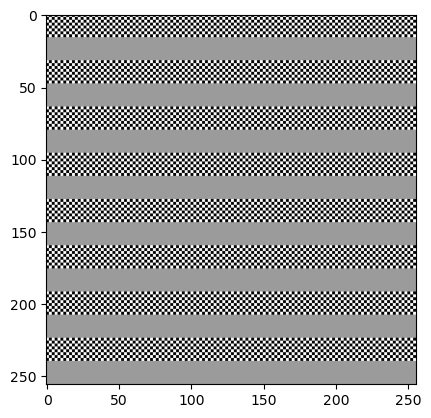

In [87]:
### PART 4.2 - Determining gamma value of monitor ####
print(31 % 32)

def im_display(grey_lvl):
    arr = np.zeros((256,256))
    for i in range(0,arr.shape[0]):
        for j in range(0,arr.shape[1]):
            
            if (i % 4 < 2) and (i % 32 < 16) :
                #first and second row of checkerboard and in a checkerboard row
                if j % 4 < 2:
                    arr[i,j] = 255
            if (i % 4 >= 2) and (i % 32 < 16):
                #thrid and fourth row and in a checkerboard row
                if j % 4 >=2:
                    arr[i,j] = 255
            if (i % 32 >= 16):
                #in grey level line
                arr[i,j] = grey_lvl

    return arr
            
img = im_display(155)

plt.imshow(img, cmap='gray')
plt.show()


Text(0.5, 1.0, 'Gamma corrected img')

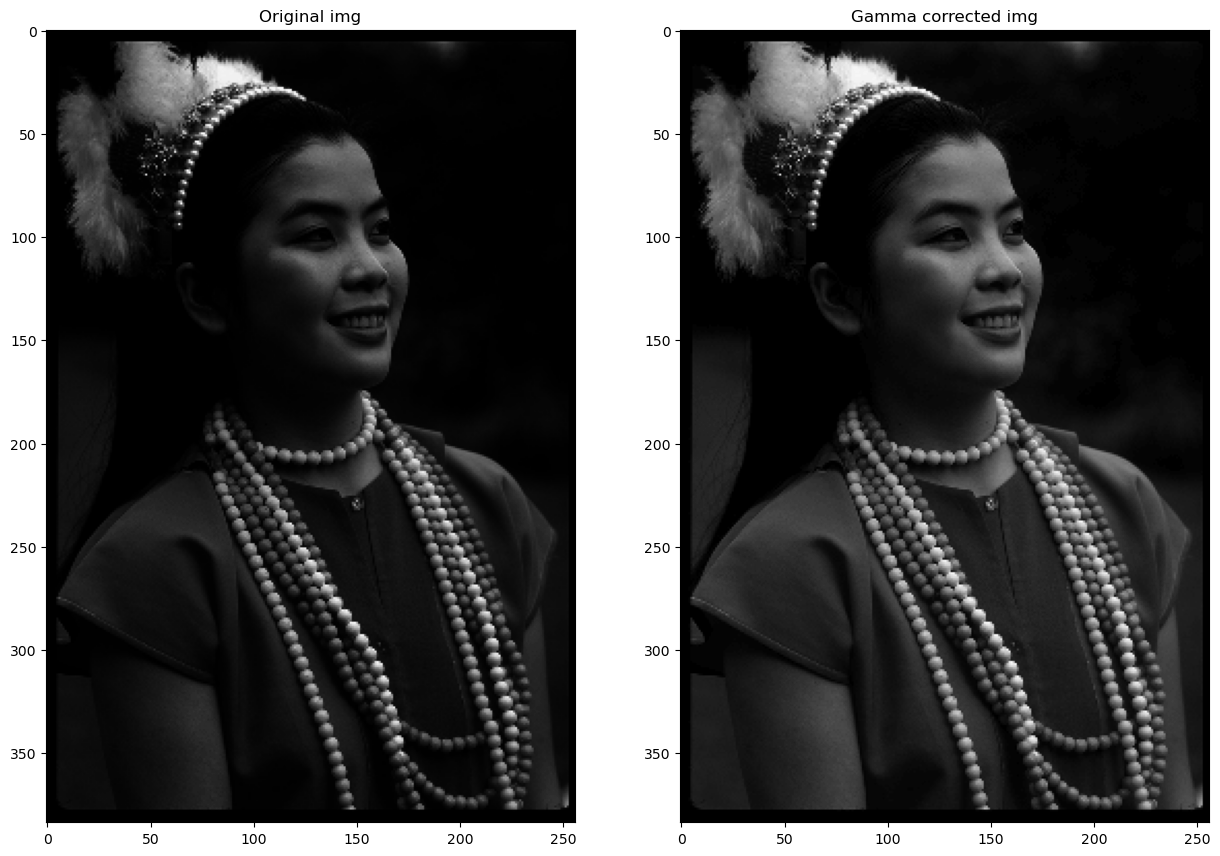

In [63]:
#### PART 4.3 - gamma correcting linear.tif ####
im_linear = Image.open('linear.tif')
im_linear_np = np.array(im_linear)
fig, ax = plt.subplots(1,2, figsize=(15, 15))
ax[0].imshow(im_linear_np, cmap = 'gray')
ax[0].set_title('Original img')

### Gamma correct original img ###
gamma = 1.39
gamma_corrected_img =  255 * ((im_linear_np/255) ** (1/gamma))
ax[1].imshow(gamma_corrected_img, cmap = 'gray')
ax[1].set_title('Gamma corrected img')

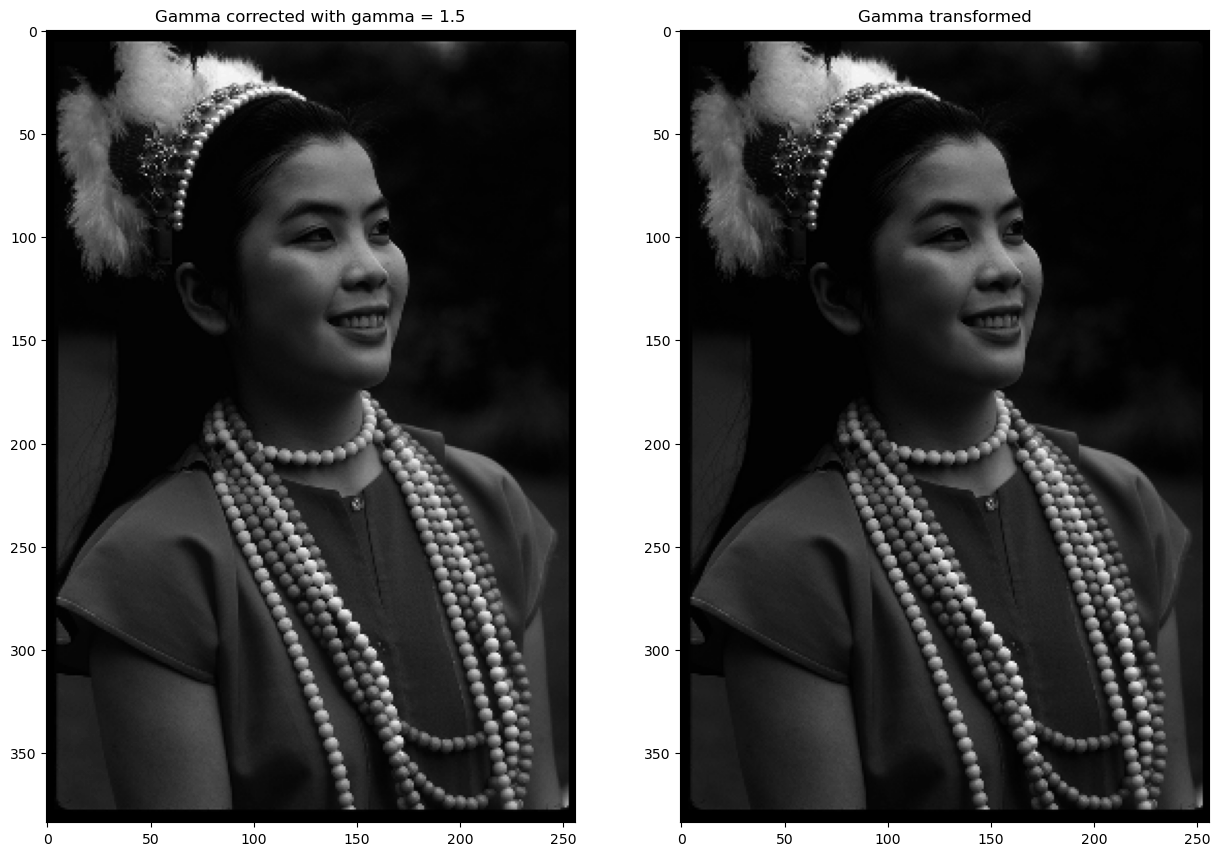

In [79]:
### PART 4.4 - transforming a gamma corrected image ####
im_gamma = Image.open('gamma15.tif')
im_gamma_np = np.array(im_gamma)
fig, ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(im_gamma_np, cmap = 'gray')
ax[0].set_title("Gamma corrected with gamma = 1.5")

### transform gamma 1.5 so it can be displayed correctly on my computer ###
gamma_in_img = 1.5
gamma_monitor = 1.39
im_gamma_np_transformed =  255 * (im_gamma_np / 255) ** gamma_in_img
im_gamma_np_transformed = 255 * (im_gamma_np_transformed / 255) ** (1/gamma)


ax[1].imshow(im_gamma_np_transformed, cmap = 'gray')
ax[1].set_title("Gamma transformed")
im_gamma_PIL_transformed = Image.fromarray(np.uint8(cm.gray(im_gamma_np_transformed)))#Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
im_gamma_PIL_transformed.save("gamma_transformed.tif", format="TIFF", save_all=True)
